In [35]:
import json
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Valori di mercato dei giocatori per paese di provenienza

In [36]:
# Fetch players data
response = requests.get(f'http://localhost:8080/sql/players').json()
players_df = pd.DataFrame(response)

In [37]:
# Make dataset lighter, clean and aggregate
players_df = players_df.query('lastSeason == 2023')
players_df.dropna(subset=['countryOfBirth', 'marketValueInEur'], inplace=True)

players_df_mean = players_df[['countryOfBirth', 'marketValueInEur']]
players_df_mean = players_df_mean.groupby('countryOfBirth')['marketValueInEur'].mean().reset_index()
pd.options.display.float_format = '{:.2f}M'.format

players_df_mean

,countryOfBirth,marketValueInEur
0,Albania,2820833.33M
1,Algeria,6030769.23M
2,Angola,10100000.00M
3,Argentina,10623553.72M
4,Armenia,933333.33M
...,...,...
136,Wales,4914285.71M
137,Yugoslavia (Republic),5104365.08M
138,Zaire,3207142.86M
139,Zambia,3466666.67M


In [38]:
# get geographic data from shape file
countries_gdf= gpd.read_file("./countryData/ne_10m_admin_0_countries.shp")
countries_gdf

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


In [39]:
# getting countries that are different across the two data sets
unmatched_countries_players = set(players_df_mean['countryOfBirth']) - set(countries_gdf['ADMIN'])
unmatched_countries_admin = set(countries_gdf['ADMIN']) - set(players_df_mean['countryOfBirth'])

print("Countries in players_df_mean but not in countries_gdf:")
print(unmatched_countries_players)

print("\nCountries in countries_gdf but not in players_df_mean:")
print(unmatched_countries_admin)

Countries in players_df_mean but not in countries_gdf:
{'Serbia and Montenegro', 'Cape Verde', 'Tanzania', 'United States', 'England', 'Jugoslawien (SFR)', 'Macedonia', 'CSSR', 'Curacao', 'Netherlands Antilles', 'Czech Republic', 'Yugoslavia (Republic)', 'Zaire', 'Guadeloupe', 'Mayotte', 'Congo', 'St. Lucia', 'The Gambia', 'Sao Tome and Principe', 'Northern Ireland', 'French Guiana', 'UdSSR', 'East Germany (GDR)', 'Martinique', 'Réunion', 'Korea, South', 'Wales', 'Bosnia-Herzegovina', 'DR Congo', 'Scotland', "Cote d'Ivoire"}

Countries in countries_gdf but not in players_df_mean:
{'Papua New Guinea', 'Namibia', 'Malawi', 'Laos', 'United States Minor Outlying Islands', 'New Caledonia', 'Belize', 'Norfolk Island', 'Somalia', 'Montenegro', 'Curaçao', 'Pakistan', 'Palau', 'Sint Maarten', 'Maldives', 'Saint Kitts and Nevis', 'Vanuatu', 'Cyprus No Mans Area', 'Marshall Islands', 'Grenada', 'Andorra', 'Cook Islands', 'Saint Barthelemy', 'Democratic Republic of the Congo', 'China', 'Pitcairn I

In [40]:
# Creating translation dictionary for country names that are different from geographic data
translation_dictionary = {
    'The Gambia': 'Gambia',
    'Northern Ireland': 'United Kingdom',
    'Cape Verde': 'Cabo Verde',
    'St. Lucia': 'Saint Lucia',
    'People\'s republic of the Congo': 'Congo',
    'Scotland': 'United Kingdom',
    'Martinique': 'France',
    'East Germany (GDR)': 'Germany',
    'Netherlands Antilles': 'Netherlands',
    'Guadeloupe': 'France',
    'Congo': 'Democratic Republic of the Congo',
    'DR Congo': 'Democratic Republic of the Congo',
    'Mayotte': 'Comoros',
    'Wales': 'United Kingdom',
    'Curacao': 'Netherlands',
    'Cote d\'Ivoire': 'Ivory Coast',
    'Neukaledonien': 'New Caledonia',
    'Serbia and Montenegro': 'Serbia',
    'Jugoslawien (SFR)': 'Yugoslavia',
    'UdSSR': 'Soviet Union',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
    'Réunion': 'France',
    'Czech Republic': 'Czechia',
    'Yugoslavia (Republic)': 'Yugoslavia',
    'Zaire': 'Congo',
    'French Guiana': 'France',
    'Macedonia': 'North Macedonia',
    'Tanzania': 'United Republic of Tanzania',
    'England': 'United Kingdom',
    'CSSR': 'Czechoslovakia',
    'Sao Tome and Principe': 'Sao Tome and Principe',
    'Korea, South': 'South Korea',
    'United States': 'United States of America',
    'Hongkong': 'Hong Kong'
}

# Substitute country names with translation dictionary
players_df_mean['countryOfBirth'] = players_df_mean['countryOfBirth'].map(translation_dictionary).fillna(players_df_mean['countryOfBirth'])

In [41]:
# Group again, merge and show map
map_data = players_df_mean.groupby('countryOfBirth')['marketValueInEur'].mean().reset_index()
map_data

,countryOfBirth,marketValueInEur
0,Albania,2820833.33M
1,Algeria,6030769.23M
2,Angola,10100000.00M
3,Argentina,10623553.72M
4,Armenia,933333.33M
...,...,...
123,Uzbekistan,1940000.00M
124,Venezuela,2157142.86M
125,Yugoslavia,3741576.48M
126,Zambia,3466666.67M


In [42]:
# Join countries data with player data on countryOfBirth
world_data_gdf = countries_gdf.merge(map_data, left_on='ADMIN', right_on='countryOfBirth', how='left')
desired_projection = 'EPSG:3857' 
world_data_gdf= world_data_gdf.to_crs(desired_projection)
world_data_gdf

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,countryOfBirth,marketValueInEur
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",Indonesia,6000000.00M
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",NaN,NaN
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",Chile,3283333.33M
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-7737827.685 -1979875.500, -7737828....",Bolivia,550000.00M
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",Peru,2950000.00M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((12641286.013 2531110.377, 1264...",NaN,NaN
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((13758756.865 -1394492.973, 13758838....",NaN,NaN
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-8904366.797 1780988.794, -8904203.7...",NaN,NaN
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-8753839.074 1788757.197, -8754210.5...",NaN,NaN


<Axes: >

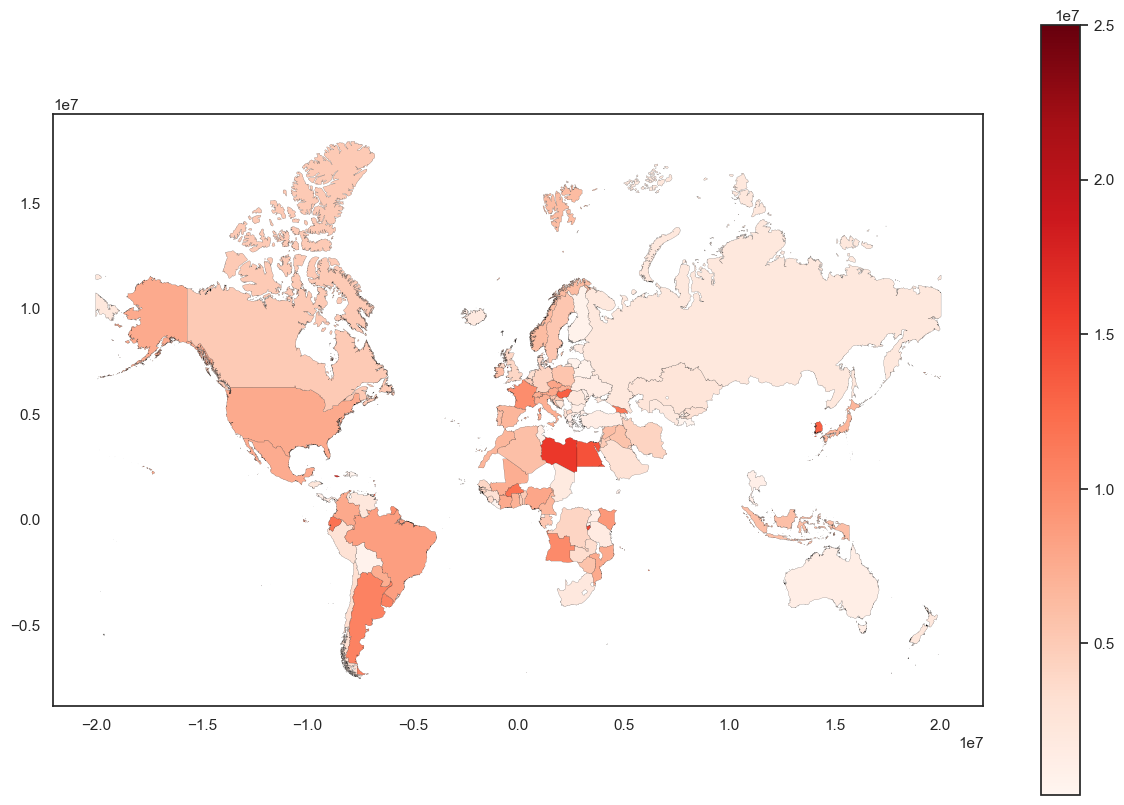

In [43]:
# Show Map
sns.set(style='white')
world_data_gdf.plot(figsize=(15,10), edgecolor='black', linewidth=0.1, column='marketValueInEur', legend=True, cmap='Reds')

# Goal medi per partita per paese di provenienza

In [44]:
# Request appearances data of specified year
response = requests.get(f'http://localhost:8080/mongo/appearances/2023').json()
appearances_df = pd.DataFrame(response)
appearances_df

,_id,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,65789550e2ebee12cbca7b1d,3838268_102017,3838268,102017,631,11,2023-01-01T00:00:00.000Z,Jorginho,GB1,0,0,0,0,72
1,65789550e2ebee12cbca7b1e,3838268_127032,3838268,127032,703,703,2023-01-01T00:00:00.000Z,Serge Aurier,GB1,0,0,1,0,90
2,65789550e2ebee12cbca7b1f,3838268_134425,3838268,134425,631,631,2023-01-01T00:00:00.000Z,Raheem Sterling,GB1,0,0,1,0,72
3,65789550e2ebee12cbca7b20,3838268_142310,3838268,142310,703,703,2023-01-01T00:00:00.000Z,Willy Boly,GB1,0,0,0,1,90
4,65789550e2ebee12cbca7b21,3838268_148252,3838268,148252,703,1025,2023-01-01T00:00:00.000Z,Remo Freuler,GB1,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133231,65789555e2ebee12cbcc838c,4172154_659813,4172154,659813,15,15,2023-11-30T00:00:00.000Z,Piero Hincapié,EL,0,0,0,0,90
133232,65789555e2ebee12cbcc838d,4172154_696027,4172154,696027,15,15,2023-11-30T00:00:00.000Z,Ayman Aourir,EL,0,0,0,0,2
133233,65789555e2ebee12cbcc838e,4172154_7161,4172154,7161,15,15,2023-11-30T00:00:00.000Z,Jonas Hofmann,EL,0,0,0,0,10
133234,65789555e2ebee12cbcc838f,4172154_743395,4172154,743395,15,15,2023-11-30T00:00:00.000Z,Noah Mbamba,EL,0,0,0,0,45


In [45]:
# Grouping data by player id and getting mean of each stat for each player
appearances_df = appearances_df[['player_id', 'yellow_cards', 'red_cards', 'goals', 'assists']]
player_stats = appearances_df.groupby('player_id').agg({
    'yellow_cards': 'mean',
    'red_cards': 'mean',
    'goals': 'mean',
    'assists': 'mean'
}).reset_index()
player_stats

,player_id,yellow_cards,red_cards,goals,assists
0,3333,0.12M,0.00M,0.00M,0.00M
1,3455,0.00M,0.00M,0.25M,0.00M
2,4742,0.25M,0.00M,0.06M,0.06M
3,5336,0.22M,0.00M,0.00M,0.00M
4,7161,0.14M,0.00M,0.40M,0.34M
...,...,...,...,...,...
7855,1160122,0.00M,0.00M,0.00M,0.00M
7856,1163778,0.00M,0.00M,0.00M,0.17M
7857,1166093,0.20M,0.00M,0.20M,0.00M
7858,1173042,0.00M,0.00M,0.00M,0.00M


In [46]:
# Joining each player with his country of birth
player_countries = players_df[['id', 'countryOfBirth']]
player_countries_stats = player_countries.merge(player_stats, how='inner', left_on='id', right_on='player_id')
player_countries_stats

,id,countryOfBirth,player_id,yellow_cards,red_cards,goals,assists
0,22860,Denmark,22860,0.00M,0.00M,0.00M,0.00M
1,30321,Argentina,30321,0.14M,0.00M,0.03M,0.06M
2,38780,Portugal,38780,0.06M,0.00M,0.00M,0.06M
3,40204,England,40204,0.00M,0.03M,0.00M,0.00M
4,43250,Belgium,43250,0.13M,0.00M,0.03M,0.03M
...,...,...,...,...,...,...,...
5664,1004618,France,1004618,0.00M,0.00M,0.00M,0.00M
5665,284732,Algeria,284732,0.27M,0.00M,0.03M,0.07M
5666,371851,Slovenia,371851,0.21M,0.00M,0.03M,0.06M
5667,586756,Ireland,586756,0.14M,0.00M,0.00M,0.07M


In [47]:
# Group by country of birth and get mean of each country
player_countries_stats = player_countries_stats.groupby('countryOfBirth').agg({
    'yellow_cards': 'mean',
    'red_cards': 'mean',
    'goals': 'mean',
    'assists': 'mean'
}).reset_index()
player_countries_stats

,countryOfBirth,yellow_cards,red_cards,goals,assists
0,Albania,0.11M,0.02M,0.12M,0.05M
1,Algeria,0.15M,0.00M,0.15M,0.07M
2,Angola,0.16M,0.00M,0.07M,0.06M
3,Argentina,0.18M,0.00M,0.10M,0.07M
4,Armenia,0.24M,0.00M,0.02M,0.12M
...,...,...,...,...,...
134,Wales,0.13M,0.00M,0.06M,0.06M
135,Yugoslavia (Republic),0.17M,0.00M,0.07M,0.05M
136,Zaire,0.17M,0.00M,0.05M,0.03M
137,Zambia,0.12M,0.00M,0.10M,0.14M


In [48]:
# Join map data with player stats of each country
world_stats_gdf = countries_gdf.merge(player_countries_stats, left_on='ADMIN', right_on='countryOfBirth', how='left')
world_stats_gdf[['ADMIN', 'red_cards','yellow_cards','goals','assists']]

,ADMIN,red_cards,yellow_cards,goals,assists
0,Indonesia,0.00M,0.09M,0.00M,0.00M
1,Malaysia,NaN,NaN,NaN,NaN
2,Chile,0.00M,0.13M,0.12M,0.04M
3,Bolivia,0.00M,0.05M,0.05M,0.09M
4,Peru,0.00M,0.21M,0.00M,0.00M
...,...,...,...,...,...
253,Macao S.A.R,NaN,NaN,NaN,NaN
254,Ashmore and Cartier Islands,NaN,NaN,NaN,NaN
255,Bajo Nuevo Bank (Petrel Is.),NaN,NaN,NaN,NaN
256,Serranilla Bank,NaN,NaN,NaN,NaN


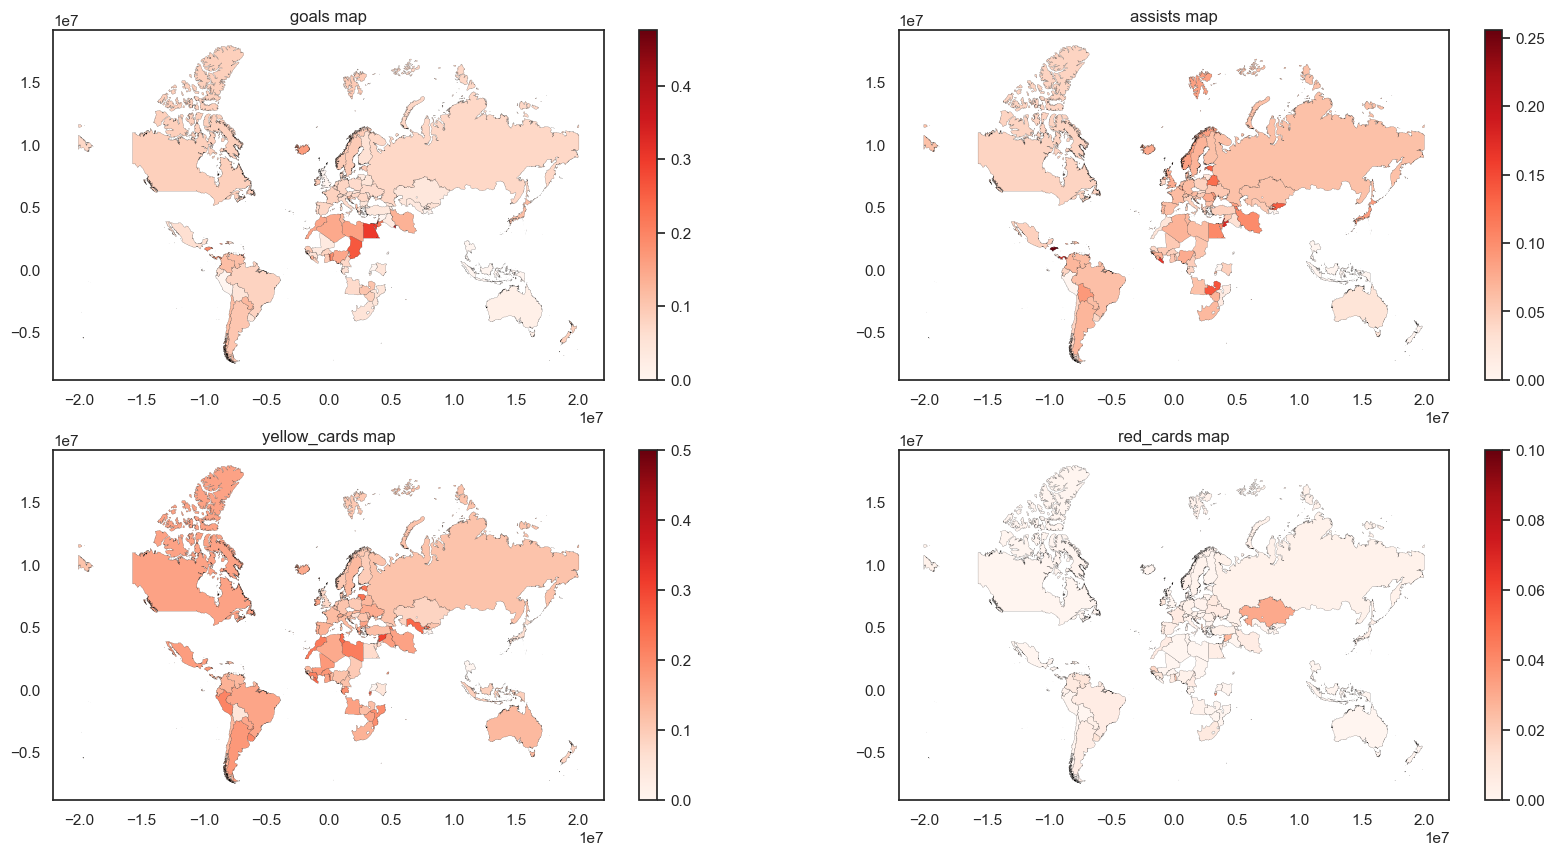

In [49]:
# Show map for each stat (column)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

columns = ['goals', 'assists', 'yellow_cards', 'red_cards']
world_stats_gdf = world_stats_gdf.to_crs(desired_projection)

for i, ax in enumerate(axes.flatten()):
    column = columns[i]
    world_stats_gdf.plot(ax=ax, edgecolor='black', linewidth=0.1, column=column, legend=True, cmap='Reds')
    ax.set_title(f'{column} map')
    
plt.show()